In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
import pycaret
from pycaret.classification import *

In [3]:
%matplotlib inline
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('winequality.csv')

In [5]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [8]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [9]:
#imp imp imp imp imp imp imp imp imp imp imp imp imp imp imp imp 
#fill the missing values
for col,value in df.items():
    if col != 'type':
        df[col]=df[col].fillna(df[col].mean())

In [10]:
#imp imp imp imp imp imp imp imp
# log transformation
df['free sulfur dioxide'] = np.log(1 + df['free sulfur dioxide'] )

<AxesSubplot:xlabel='quality', ylabel='count'>

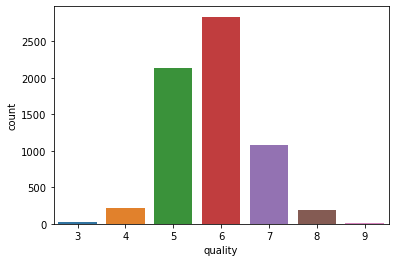

In [11]:
sns.countplot(df['quality'])
#this case is known as partial output where the majority pridictions will be in the eregion of average case i.e 5,6,7

<AxesSubplot:>

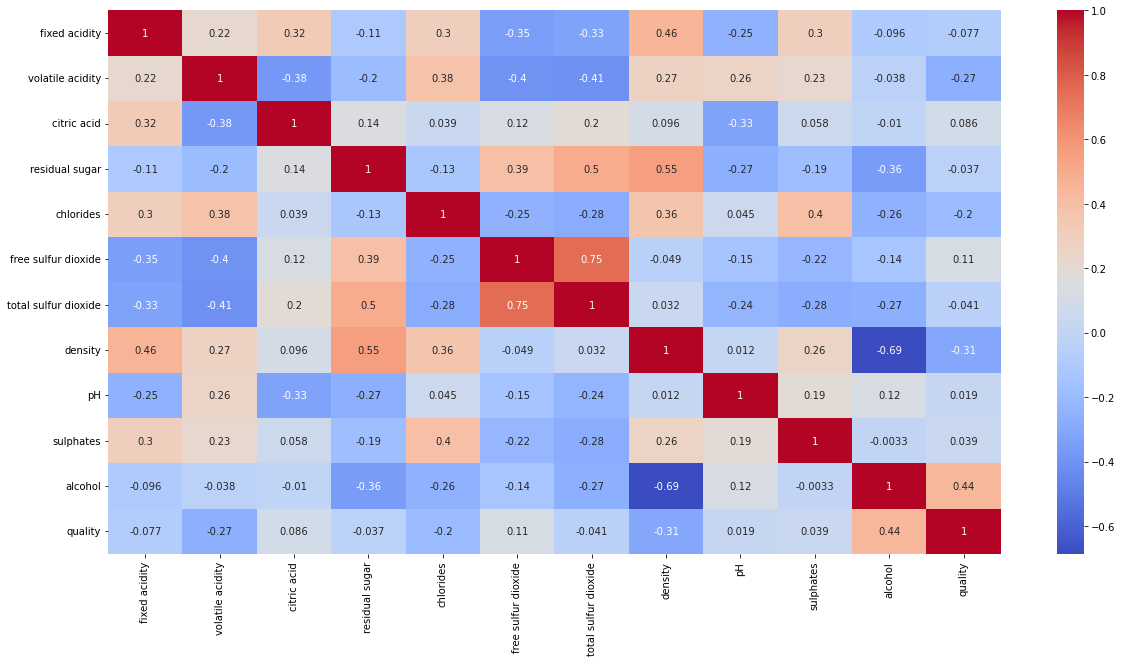

In [12]:
#corelation matrix
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='coolwarm' )

In [13]:
x= df.drop(columns=['type','quality'])
y=df['quality']

In [14]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [17]:
#class imbalancement
from imblearn.over_sampeling import SMOTE

ModuleNotFoundError: No module named 'imblearn.over_sampeling'

In [18]:
conda install -c conda-forge imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: imbalanced-learn


In [26]:
oversample = SMOTE(k_neighbors=4)

In [21]:
#IMP IMP IMP IMP IMP IMP IMP IMP IMP IMP IMP IMP IMP
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [23]:
y.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [24]:
x.value_counts()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH    sulphates  alcohol
7.3            0.19              0.27         13.9            0.057      3.828641             155.0                 0.99807  2.94  0.41       8.8        8
7.0            0.15              0.28         14.7            0.051      3.401197             149.0                 0.99792  2.96  0.39       9.0        8
6.8            0.18              0.30         12.8            0.062      2.995732             171.0                 0.99808  3.00  0.52       9.0        7
7.4            0.16              0.30         13.7            0.056      3.526361             168.0                 0.99825  2.90  0.44       8.7        7
                                 0.27         15.5            0.050      3.258097             135.0                 0.99840  2.90  0.43       8.7        6
                                                                           

In [27]:
#TRANSFORM THE DATA SET
x,y =   oversample.fit_resample(x,y)

In [29]:
#model training
from sklearn.model_selection import cross_val_score,train_test_split
def classify(model,x,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
    #train the model
    model.fit(x_train,y_train)
    print("accuracy:",model.score(x_test,y_test)*100)
    score=cross_val_score(model,x,y,cv=5)
    print("cv score",np.mean(score)*100)

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,x,y)

accuracy: 34.09228289341124
cv score 32.67675026815952


In [31]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model,x,y)

accuracy: 81.44267580092685
cv score 75.12099624037496


In [32]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model,x,y)

accuracy: 88.13217811807374
cv score 82.32933858636322


In [54]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model,x,y)

accuracy: 89.07918597622407
cv score 83.63896181827062


In [52]:
import xgboost as xgb
model = xgb.XGBClassifier()
classify(model,x,y)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6], got [3 4 5 6 7 8 9]

In [36]:
import lightgbm
model = lightgbm.LGBMClassifier()
classify(model,x,y)

accuracy: 86.86278460608503
cv score 80.78809910896823


In [37]:
import pycaret

In [38]:
from pycaret.classification import *

In [45]:
mclf = setup(data=df,target='quality',session_id=123,fold_shuffle=True,iterative_imputation_iters= 5,imputation_type='iterative')

,Description,Value
0,session_id,123
1,Target,quality
2,Target Type,Multiclass
3,Label Encoded,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6"
4,Original Data,"(6497, 13)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


AttributeError: 'Make_Time_Features' object has no attribute 'list_of_features'

In [46]:
my=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6596,0.2525,0.3837,0.6669,0.6460,0.4670,0.4730,0.1380
et,Extra Trees Classifier,0.6565,0.2555,0.3857,0.6608,0.6437,0.4626,0.4687,0.1170
xgboost,Extreme Gradient Boosting,0.6499,0.2462,0.3891,0.6517,0.6397,0.4574,0.4612,0.5080
lightgbm,Light Gradient Boosting Machine,0.6444,0.2437,0.3761,0.6441,0.6336,0.4491,0.4525,0.2670
gbc,Gradient Boosting Classifier,0.5817,0.2287,0.3182,0.5759,0.5653,0.3428,0.3488,0.9300
dt,Decision Tree Classifier,0.5665,0.2040,0.3783,0.5659,0.5655,0.3553,0.3556,0.0100
lda,Linear Discriminant Analysis,0.5366,0.2196,0.2654,0.5183,0.5166,0.2702,0.2754,0.0050
ridge,Ridge Classifier,0.5338,0.0000,0.2217,0.4882,0.4674,0.2295,0.2471,0.0090
lr,Logistic Regression,0.5294,0.2125,0.2284,0.4798,0.4836,0.2333,0.2456,0.6360
knn,K Neighbors Classifier,0.4860,0.1981,0.2511,0.4677,0.4707,0.2011,0.2029,0.0100


In [47]:
createmodel = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6857,0.0000,0.4462,0.6811,0.6740,0.5142,0.5170
1,0.6418,0.0000,0.3569,0.6286,0.6224,0.4362,0.4425
2,0.6440,0.0000,0.3940,0.6584,0.6314,0.4446,0.4484
3,0.6769,0.0000,0.4430,0.6842,0.6654,0.4941,0.5016
4,0.6769,0.8499,0.3562,0.6804,0.6642,0.4935,0.5012
5,0.6637,0.8282,0.3613,0.6754,0.6538,0.4749,0.4807
6,0.6527,0.8470,0.3663,0.6504,0.6420,0.4603,0.4650
7,0.6652,0.0000,0.3665,0.6791,0.6480,0.4703,0.4794
8,0.6366,0.0000,0.3754,0.6606,0.6228,0.4263,0.4346
9,0.6520,0.0000,0.3712,0.6707,0.6360,0.4558,0.4601


In [51]:
tuned = my.tune_model()

AttributeError: 'RandomForestClassifier' object has no attribute 'tune_model'

In [ ]:
pip install autoviml

In [16]:
errors="raise"

In [ ]:
clf=setup(df,
target='quality',
fold_shuffle=True,
session_id=123,
imputation_type='iterative',
remove_multicollinearity=True,
multicollinearity_threshold=0.95,
fix_imbalance=True,fix_imbalance_method=any)